# Toolbox Template Expansion as a Service - Single Tool


### Tool Template and Binding Document

The box below shows a binding example to expand a PROV-Template that represent the execution lineage of a single Tool. The example is related to the tool **montly_mean**. 

The template is avalable at the following for consultation.

https://openprovenance.org/store/documents/1059


### Software Requirements

The following python and prov modules are used by this notebook

*python = 3.7.2*

*prov = 1.5.1*

The remote Provenance Template Catalogue can be downloaded and installed through Docker, as explained here

https://github.com/EnvriPlus-PROV/ProvTemplateCatalog#setup-using-docker


### Local Expansion With ProvToolbox

The bindings presented in this notebook can be expanded also by using the ProvToolbox

https://lucmoreau.github.io/ProvToolbox/

Command line execution example:

```
provconvert -infile template.provn  -bindings binding.json  -outfile doc.json -bindver 3

```

In [32]:
json_string="""
{

  "var" : {
   "derivtype": ["c3s:Mean"],
   "toolbox":[{"@id":"uuid:C3SToolBox0001"}],
   "parameter":[{"@id":"uuid:par0001"},{"@id":"uuid:par0002"}],
   "input": [{"@id":"uuid:91991554"}],
   "accessUrlOut":["https://cds.data/91991343"],
   "accessUrlInp":["https://cds.data/9199194"],
   "version":["v0.5"],
   "pid": ["12345"],
   "cresource":[{"@id":"uuid:DIAS_BCN"}],
   "worker": ["node6c3s"],
   "accessUrlDocumentation":["https://git.ecmwf.int/projects/CST/repos/cdstools/commits/7f4d184cf8f0638cedd4039a4293b8afb674f392#cdstools/season.py"],
   "user":[{"@id": "http://orcid.org/0000-0002-3494-120X"}],
   "tool": [{"@id":"uuid:monyhly_trend0001"}],
   "lib": [{"@id":"uuid:numpy10"},{"@id":"uuid:xarray20"}],
    
   "executionStartTime": ["2019-06-07T15:58:58Z"],
   "executionEndTime":["2019-06-07T16:58:58Z"],
   "startedAt":["2019-06-07T15:51:58Z"],
   "generatedAt":["2019-06-07T15:58:58Z"]
  },
  "context" : {
  
     "prov": "http://www.w3.org/ns/prov#",
     "xsd": "http://www.w3.org/2001/XMLSchema#",
     "tmpl": "http://openprovenance.org/tmpl#",
     "var": "http://openprovenance.org/var#",
     "c3s": "http://linktovoc.org/#",
     "uuid": "urn:uuid:",
     "http": "http:" 
     

  }
}
"""

### Execution of the Expansion as a service

The template is stored in a AWS deployed Proveance Template Service to allow its expansion. 
The script below refers to the template template_id and to the host_name of the service used for this demonstration.

The Provenance Catalgue's expansion service is invoked through a POST request.

In [33]:
import requests
from urllib.parse import urlencode, quote_plus


host_name = 'swirrl.climate4impact.eu/prov-template-catalog'
template_id = '5e3aa1e23b832a12476119ff'


r = requests.post('https://' + host_name + '/api/templates/' + template_id + 
    '/expand?fmt=provjson&writeprov=false&bindver=v3',
        data=json_string, verify=False)

print(r.text)

{"prefix": {"ex": "http://example.com/#", "provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "rdfs": "http://www.w3.org/2000/01/rdf-schema#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-prov-o.owl", "c3s": "http://linktovoc.org/#", "tmpl": "http://openprovenance.org/tmpl#", "var": "http://openprovenance.org/var#", "vcard": "http://www.w3.org/2006/vcard/ns#", "xml": "http://www.w3.org/XML/1998/namespace", "http": "http:", "uuid": "urn:uuid:", "vargen": "http://openprovenance.org/vargen#", "rdf": "http://www.w3.org/1999/02/22-rdf-syntax-ns#"}, "bundle": {"uuid:00af8ad1-bcfe-4a16-bf50-fa4ed9ada868": {"prefix": {"provone": "http://purl.dataone.org/provone/2015/01/15/ontology#", "uuid": "urn:uuid:", "c3s": "http://linktovoc.org/#", "var": "http://openprovenance.org/var#", "vargen": "http://openprovenance.org/vargen#", "s-prov": "https://github.com/aspinuso/s-provenance/blob/master/resources/s-prov-o.owl", "http": "http:", "vcard": "http://www.

/Users/aspinuso2/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'swirrl.climate4impact.eu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


### Visualisation

Thanks to the https://pypi.org/project/prov/ module documents can be visualised as follows.

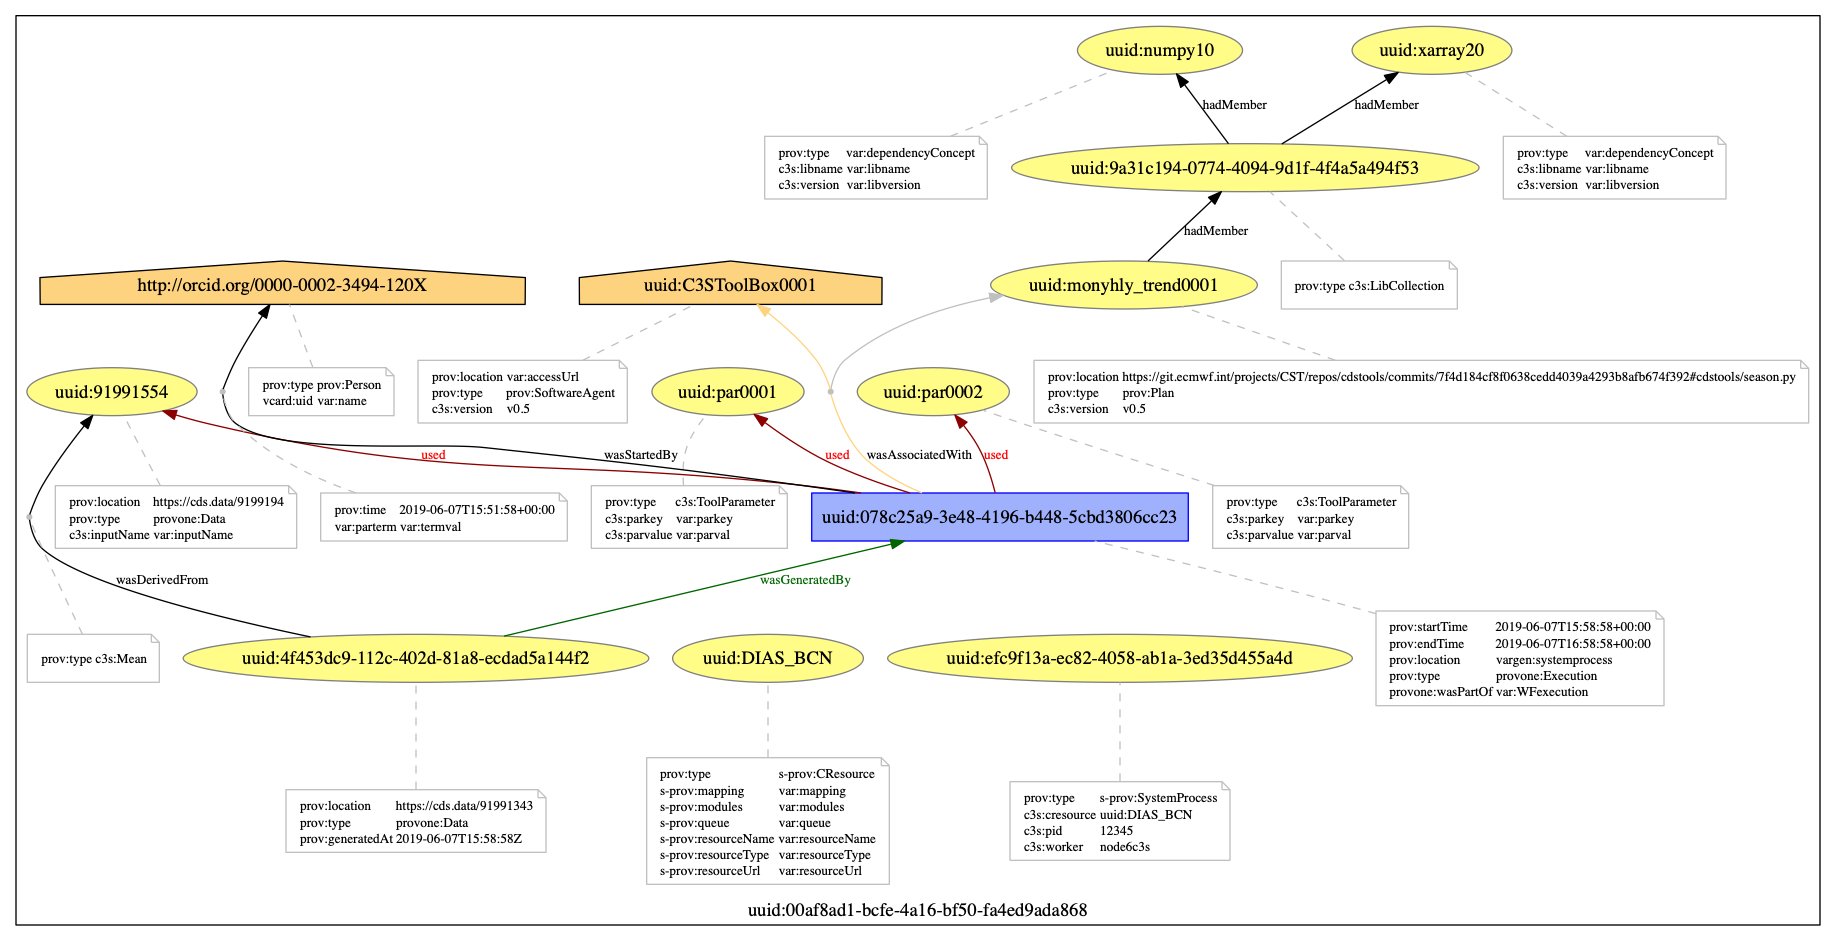

In [34]:
from prov.serializers.provjson import ProvJSONSerializer
from IPython.display import Image
import io
from prov.model import ProvDocument, ProvBundle, ProvException, first, Literal
from prov.dot import prov_to_dot

def provJSONtoPNG(doc,format):
     
    
    doc=ProvJSONSerializer.deserialize(ProvJSONSerializer,doc)
    dot = prov_to_dot(doc)
    
    if format=="png":
        dot.write_png('PROV.png')
        return 'PROV.png' 
    if format=="svg":
        dot.write_svg('PROV.svg')
        return 'PROV.svg'
    
    

f = io.StringIO(r.text)
png_content=provJSONtoPNG(f,"png")

Image(png_content)